**PART 3 : TIME SERIES DATA** 

In [38]:
#Importing libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import f
from statsmodels.stats.diagnostic import het_white
sns.set_style('dark')
from scipy.stats import t
import statsmodels.stats.api as sms
from statsmodels.tsa.stattools import grangercausalitytests

**Extraction données :** This part uses the threecenturies_v2.3 datasets. Import Real GDP at market prices, unemployment 
rate and consumer price inflation for the period 1900-2000 in Python from the A1 worksheet

In [33]:
# Name of the worksheet we want to extract
name_sheet = "A1. Headline series"

# Colonmns from wich we will extract the data 
colomns_to_extract = [0,1,16,27]

# We load Excel file data into a DataFrame
df = pd.read_excel("threecenturies_v2.3.xlsx", sheet_name=name_sheet,header=None,  skiprows=7)

df = df.iloc[:, colomns_to_extract]

df.columns= ["Year", "Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]

df = df[(df['Year'] >= 1900) & (df['Year'] <= 2000)]

df


,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation
240,1900,1.811603e+05,55.463046,1.130612
241,1901,1.849745e+05,55.465670,1.127220
242,1902,1.877566e+05,55.468294,1.127220
243,1903,1.860158e+05,55.470918,1.139657
244,1904,1.881556e+05,55.473542,1.135135
...,...,...,...,...
336,1996,1.243709e+06,33.059776,68.818500
337,1997,1.282602e+06,33.030485,70.074167
338,1998,1.323527e+06,32.765721,71.165500
339,1999,1.366983e+06,32.830686,72.111083


**Question 27 : Define strict and weak stationarity.**

A time series is striclty stationary if or any collection of indices $ t_1 \leq t_2 < \ldots < t_m,$the joint distribution of $(x_{t_1}, \ldots, x_{t_m}) $ is the same as the joint distribution of $(x_{t_1+h}, \ldots, x_{t_m+h})$ for any h. In other words, if all joint distributions are invariant to shifts in time.

A time series is weakly stationary if it has a constant mean and the covariance is stationary ie $\text{Cov}(Y_t, Y_{t + \tau}) = \gamma(\tau).$ It is less restrictive than the strict stationarity.


**Question 28 : Explain ergodicity and state the ergodic theorem. Illustrate with an example**

Ergodicity refers to processes that "forget" the initial conditions, i.e. (the autocorrelation of order $\tau$ tends to 0 for $|\tau| \rightarrow \infty).$
$$$$
The ergodic theorem is the following : If  $\{y_t\}$ is strictly stationary and ergodic, and $ E(y_T) < \infty$ as $T \rightarrow \infty$, then the time average converges to the spatial average (the expectation). 

For example, let's consider a fair six-sided die roll. Each roll is an independent and iid. If we define the process $\{X_t\}$ as the sequence of die rolls, this process is stationary and ergodic.
Now, let $g(X_t)$ be the value of the die on the $t$-th roll. The ergodic theorem states that the time average of the die values over many rolls converges to the expected value of a single roll. In our case:

$\lim_{{T \to \infty}} \frac{1}{T} \sum_{{t=1}}^{T} X_t = E[X_t] = \frac{1+2+3+4+5+6}{6} = 3.5.$


So, as we roll the die many times, the average value per roll converges to 3.5, which is the expected value of a single die roll. It highlights the ergotic theorem.



**Question 29 : Why do we need both stationarity and ergodicity?**

The two conditions are required to apply the ergodic theorem, therefore to equate the time average with the spatial average. Then, it allows us to analyze the process by examining a single trajectory

**Question 30 : Explain “spurious regression”.**

Spurious regression is a phenomenon that occurs when a regression analysis indicates a significant relationship between two variables, they seem correlated, although there is no true causal relationship between them. This false correlation can be due to another unobserved variable or sometimes just a coincidence.

**Question 31 :  Define a moving average and explain the trade-off involved in the choice of the size of the window and of whether to center or not the moving average**

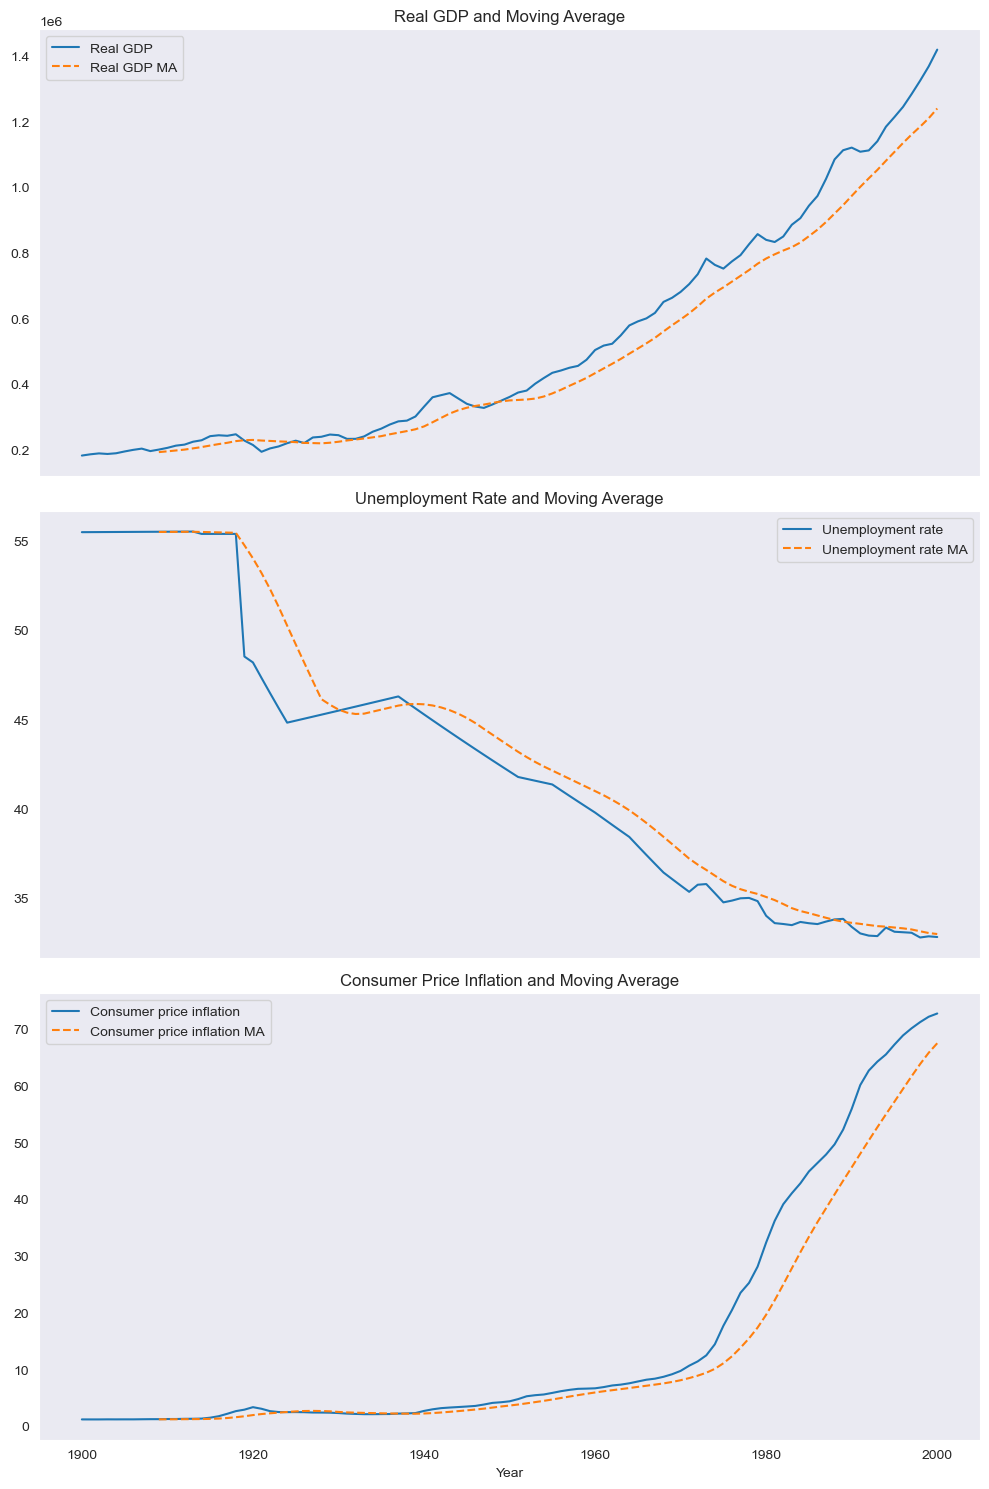

In [34]:
# Define the window size for the moving average
window_size = 10  

# Calculate the moving averages
df['Real GDP MA'] = df['Real GDP at market prices'].rolling(window=window_size).mean()
df['Unemployment rate MA'] = df['Unemployment rate'].rolling(window=window_size).mean()
df['Consumer price inflation MA'] = df['Consumer price inflation'].rolling(window=window_size).mean()

# Plotting in subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)

# Plot for Real GDP
axes[0].plot(df['Year'], df['Real GDP at market prices'], label='Real GDP')
axes[0].plot(df['Year'], df['Real GDP MA'], label='Real GDP MA', linestyle='--')
axes[0].set_title('Real GDP and Moving Average')
axes[0].legend()

# Plot for Unemployment Rate
axes[1].plot(df['Year'], df['Unemployment rate'], label='Unemployment rate')
axes[1].plot(df['Year'], df['Unemployment rate MA'], label='Unemployment rate MA', linestyle='--')
axes[1].set_title('Unemployment Rate and Moving Average')
axes[1].legend()

# Plot for Consumer Price Inflation
axes[2].plot(df['Year'], df['Consumer price inflation'], label='Consumer price inflation')
axes[2].plot(df['Year'], df['Consumer price inflation MA'], label='Consumer price inflation MA', linestyle='--')
axes[2].set_title('Consumer Price Inflation and Moving Average')
axes[2].legend()

plt.xlabel('Year')
plt.tight_layout()
plt.show()


Choosing a larger window size in a moving average offers a smoother representation of long-term trends but may introduce a delay in responding to changes. Conversely, opting for a smaller window enhances sensitivity to changes but may result in a less stable representation due to increased sensitivity to noise. The decision to center the moving average introduces a trade-off between symmetry and responsiveness, as a centered average provides a balanced view but comes with a delay, while a non-centered version reacts more quickly at the expense of symmetry.

**Question 32 : Make all time series stationary by computing the difference between the original variable and a moving average of order 10.**

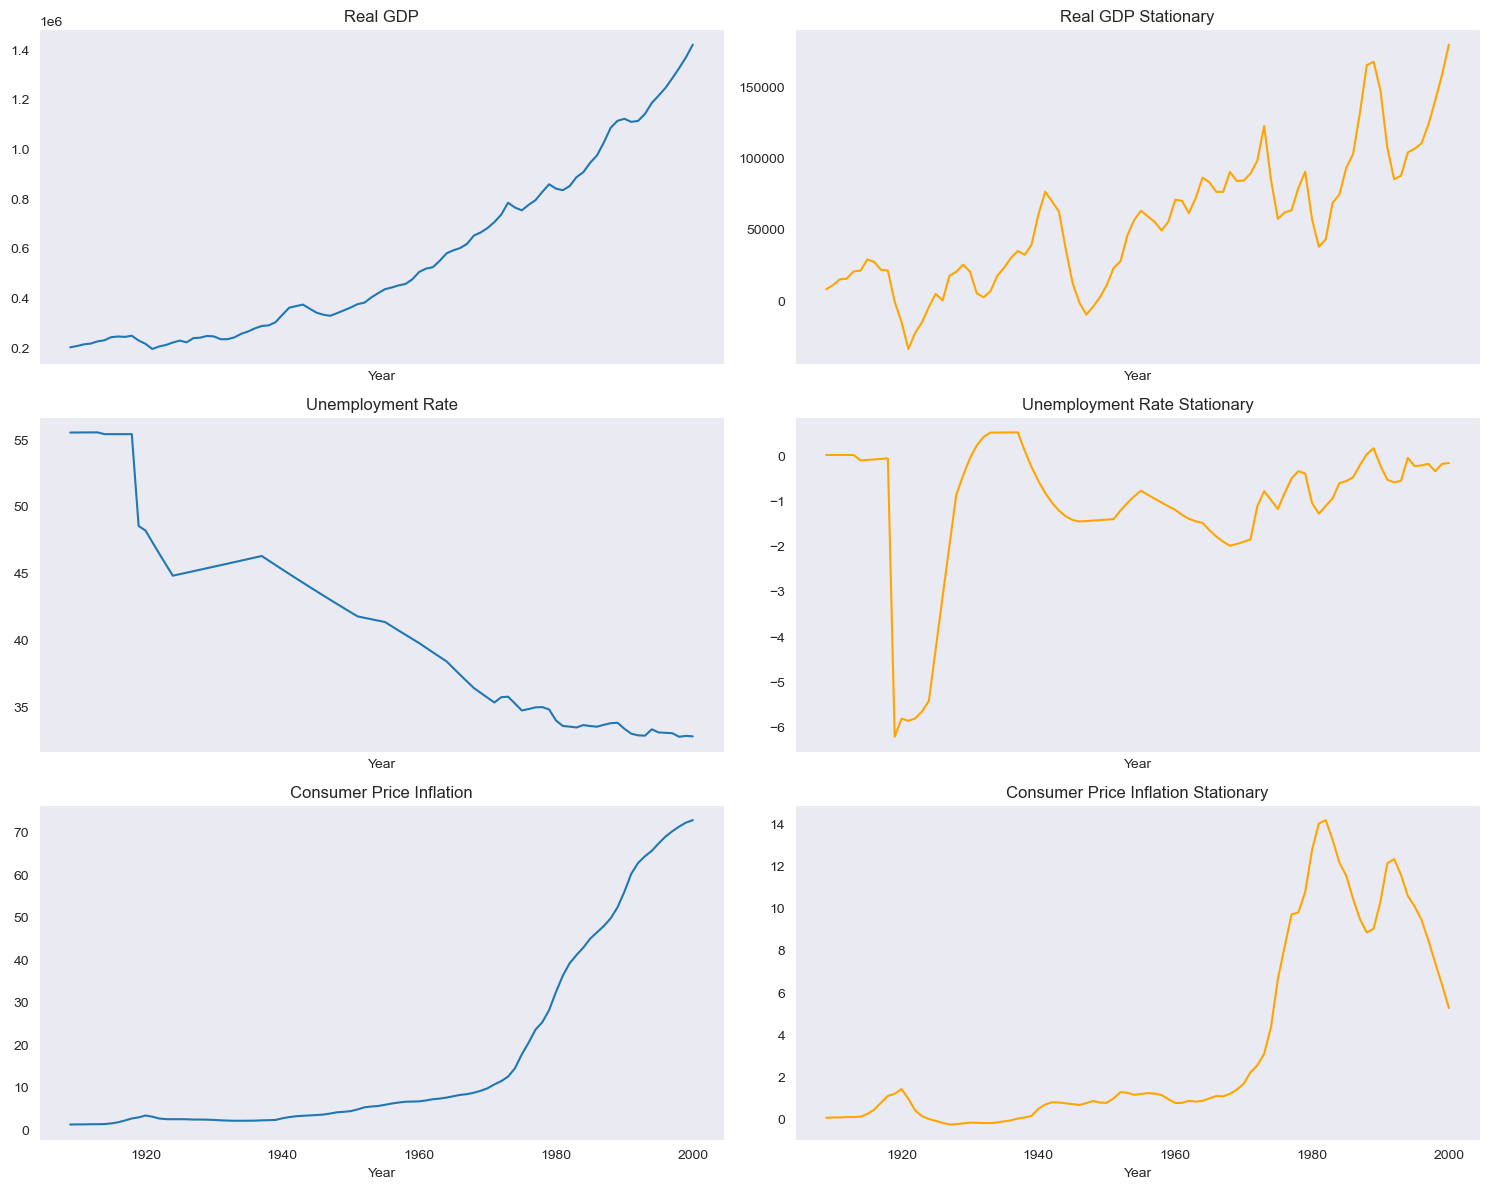

In [32]:
# Define the order for the moving average
order = 10

# Compute the moving averages
df['Real GDP MA Order 10'] = df['Real GDP at market prices'].rolling(window=order).mean()
df['Unemployment rate MA Order 10'] = df['Unemployment rate'].rolling(window=order).mean()
df['Consumer price inflation MA Order 10'] = df['Consumer price inflation'].rolling(window=order).mean()

# Make time series stationary by computing the difference
df['Real GDP Stationary'] = df['Real GDP at market prices'] - df['Real GDP MA Order 10']
df['Unemployment rate Stationary'] = df['Unemployment rate'] - df['Unemployment rate MA Order 10']
df['Consumer price inflation Stationary'] = df['Consumer price inflation'] - df['Consumer price inflation MA Order 10']

# Dropping NaN values and potential duplicates :
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Plotting the stationary time series on separate graphs
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12), sharex=True)

# Plot for Real GDP
axes[0, 0].plot(df['Year'], df['Real GDP at market prices'], label='Real GDP')
axes[0, 0].set_title('Real GDP')

axes[0, 1].plot(df['Year'], df['Real GDP Stationary'], label='Real GDP Stationary', color='orange')
axes[0, 1].set_title('Real GDP Stationary')

# Plot for Unemployment Rate
axes[1, 0].plot(df['Year'], df['Unemployment rate'], label='Unemployment rate')
axes[1, 0].set_title('Unemployment Rate')

axes[1, 1].plot(df['Year'], df['Unemployment rate Stationary'], label='Unemployment rate Stationary', color='orange')
axes[1, 1].set_title('Unemployment Rate Stationary')

# Plot for Consumer Price Inflation
axes[2, 0].plot(df['Year'], df['Consumer price inflation'], label='Consumer price inflation')
axes[2, 0].set_title('Consumer Price Inflation')

axes[2, 1].plot(df['Year'], df['Consumer price inflation Stationary'], label='Consumer price inflation Stationary', color='orange')
axes[2, 1].set_title('Consumer Price Inflation Stationary')

# Common X-axis label
for ax in axes.flatten():
    ax.set_xlabel('Year')

# Adjust layout
plt.tight_layout()
plt.show()


**Question 33 : Compute the difference between the resulting time series of question 32 and a moving average of order 5. Give the exact formula for the weights after the two transformations.**

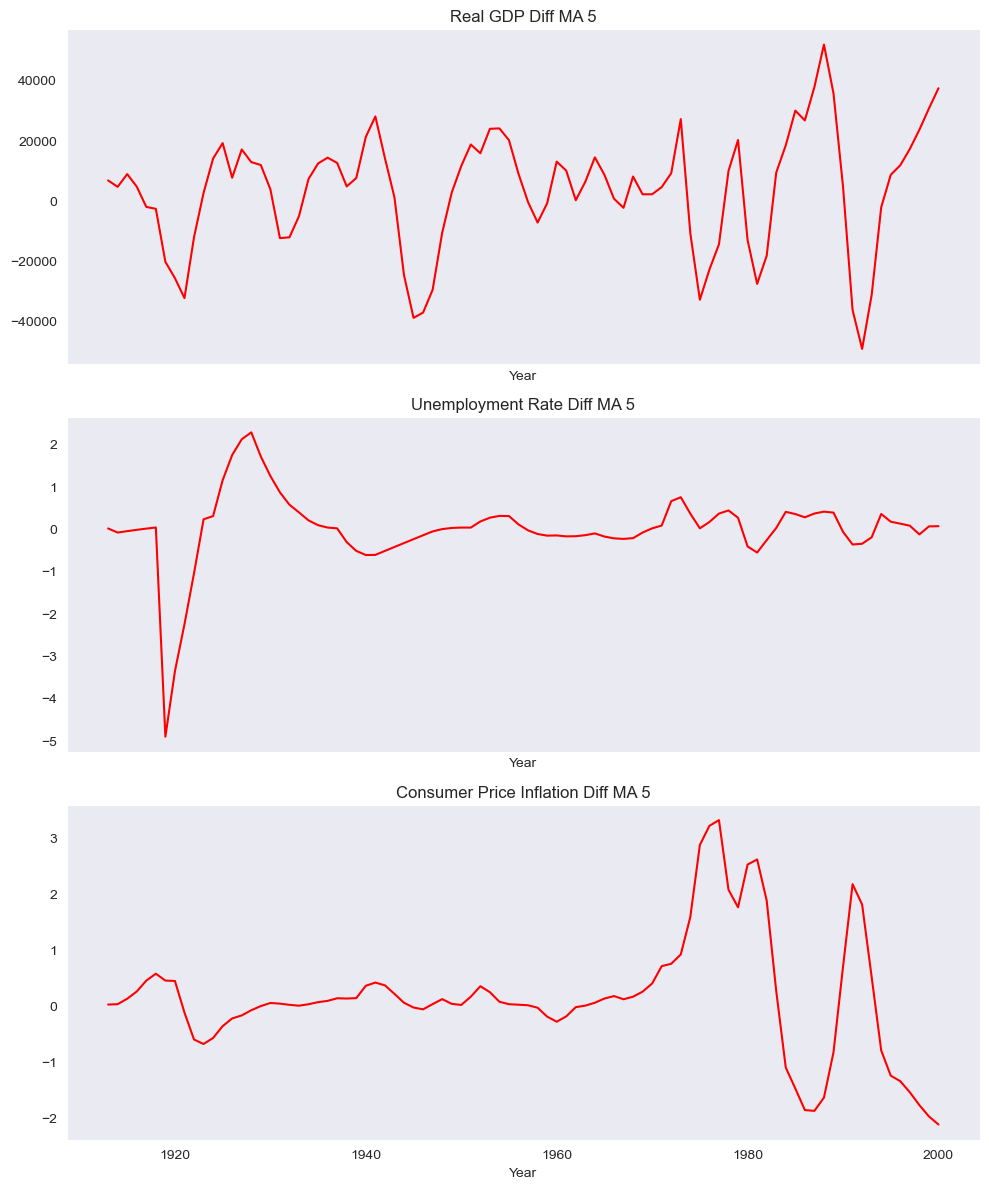

In [33]:
# Define the order for the second moving average
order_2 = 5

# Compute the second moving averages
df['Real GDP MA Order 5'] = df['Real GDP Stationary'].rolling(window=order_2).mean()
df['Unemployment rate MA Order 5'] = df['Unemployment rate Stationary'].rolling(window=order_2).mean()
df['Consumer price inflation MA Order 5'] = df['Consumer price inflation Stationary'].rolling(window=order_2).mean()

# Compute the difference between the second moving averages and the stationary time series
df['Real GDP Diff MA 5'] = df['Real GDP Stationary'] - df['Real GDP MA Order 5']
df['Unemployment rate Diff MA 5'] = df['Unemployment rate Stationary'] - df['Unemployment rate MA Order 5']
df['Consumer price inflation Diff MA 5'] = df['Consumer price inflation Stationary'] - df['Consumer price inflation MA Order 5']

# Dropping NaN values and potential duplicates :
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Plotting the differences
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

axes[0].plot(df['Year'], df['Real GDP Diff MA 5'], label='Real GDP Diff MA 5', color='red')
axes[0].set_title('Real GDP Diff MA 5')

axes[1].plot(df['Year'], df['Unemployment rate Diff MA 5'], label='Unemployment rate Diff MA 5', color='red')
axes[1].set_title('Unemployment Rate Diff MA 5')

axes[2].plot(df['Year'], df['Consumer price inflation Diff MA 5'], label='Consumer price inflation Diff MA 5', color='red')
axes[2].set_title('Consumer Price Inflation Diff MA 5')

# Common X-axis label
for ax in axes.flatten():
    ax.set_xlabel('Year')

# Adjust layout
plt.tight_layout()
plt.show()


Now, regarding the weights for a simple moving average of order 5, the weights are generally equal and sum to 1. The formula for the weights is:

$w_i = \frac{1}{N}$ where N is the order of the moving average (in this case, 5). This means that each observation is equally weighted in the calculation of the moving average.

In [35]:
df

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,Real GDP MA,Unemployment rate MA,Consumer price inflation MA
240,1900,1.811603e+05,55.463046,1.130612,NaN,NaN,NaN
241,1901,1.849745e+05,55.465670,1.127220,NaN,NaN,NaN
242,1902,1.877566e+05,55.468294,1.127220,NaN,NaN,NaN
243,1903,1.860158e+05,55.470918,1.139657,NaN,NaN,NaN
244,1904,1.881556e+05,55.473542,1.135135,NaN,NaN,NaN
...,...,...,...,...,...,...,...
336,1996,1.243709e+06,33.059776,68.818500,1133583.0,33.278142,59.389704
337,1997,1.282602e+06,33.030485,70.074167,1159408.6,33.215404,61.614975
338,1998,1.323527e+06,32.765721,71.165500,1183398.4,33.114249,63.769610
339,1999,1.366983e+06,32.830686,72.111083,1208934.9,33.016365,65.758917


**Question 34 : Using the original dataset, test the unit root hypothesis for all variables.**

In [35]:
# Perform ADF test for Real GDP at market prices
result_real_gdp = sm.tsa.adfuller(df['Real GDP at market prices'])
print(f"ADF Statistic for Real GDP: {result_real_gdp[0]}")
print(f"P-value for Real GDP: {result_real_gdp[1]}")
print(f"Critical Values for Real GDP: {result_real_gdp[4]}")
print("\n" + "="*40 + "\n")

# Perform ADF test for Unemployment rate
result_unemployment = sm.tsa.adfuller(df['Unemployment rate'])
print(f"ADF Statistic for Unemployment rate: {result_unemployment[0]}")
print(f"P-value for Unemployment rate: {result_unemployment[1]}")
print(f"Critical Values for Unemployment rate: {result_unemployment[4]}")
print("\n" + "="*40 + "\n")

# Perform ADF test for Consumer price inflation
result_inflation = sm.tsa.adfuller(df['Consumer price inflation'])
print(f"ADF Statistic for Consumer price inflation: {result_inflation[0]}")
print(f"P-value for Consumer price inflation: {result_inflation[1]}")
print(f"Critical Values for Consumer price inflation: {result_inflation[4]}")

ADF Statistic for Real GDP: 3.929160304990235
P-value for Real GDP: 1.0
Critical Values for Real GDP: {'1%': -3.5097356063504983, '5%': -2.8961947486260944, '10%': -2.5852576124567475}


ADF Statistic for Unemployment rate: -2.4373463060376896
P-value for Unemployment rate: 0.1314718680843927
Critical Values for Unemployment rate: {'1%': -3.5087828609430614, '5%': -2.895783561573195, '10%': -2.5850381719848565}


ADF Statistic for Consumer price inflation: -0.9107509934366894
P-value for Consumer price inflation: 0.7844113462797565
Critical Values for Consumer price inflation: {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}


**Question 35 : Transform all variables so that they are stationary using either your answers to questions 32-33 or to question 34.**

In [36]:
# Define the order for the first moving average
order_1 = 10

# Compute the first moving averages
df['Real GDP MA Order 10'] = df['Real GDP at market prices'].rolling(window=order_1).mean()
df['Unemployment rate MA Order 10'] = df['Unemployment rate'].rolling(window=order_1).mean()
df['Consumer price inflation MA Order 10'] = df['Consumer price inflation'].rolling(window=order_1).mean()

# Make time series stationary by computing the difference
df['Real GDP Stationary'] = df['Real GDP at market prices'] - df['Real GDP MA Order 10']
df['Unemployment rate Stationary'] = df['Unemployment rate'] - df['Unemployment rate MA Order 10']
df['Consumer price inflation Stationary'] = df['Consumer price inflation'] - df['Consumer price inflation MA Order 10']

# Define the order for the second moving average
order_2 = 5

# Compute the second moving averages
df['Real GDP MA Order 5'] = df['Real GDP Stationary'].rolling(window=order_2).mean()
df['Unemployment rate MA Order 5'] = df['Unemployment rate Stationary'].rolling(window=order_2).mean()
df['Consumer price inflation MA Order 5'] = df['Consumer price inflation Stationary'].rolling(window=order_2).mean()

# Compute the difference between the second moving averages and the stationary time series
df['Real GDP Diff MA 5'] = df['Real GDP Stationary'] - df['Real GDP MA Order 5']
df['Unemployment rate Diff MA 5'] = df['Unemployment rate Stationary'] - df['Unemployment rate MA Order 5']
df['Consumer price inflation Diff MA 5'] = df['Consumer price inflation Stationary'] - df['Consumer price inflation MA Order 5']

# Dropping NaN values and potential duplicates :
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,Real GDP MA,Unemployment rate MA,Consumer price inflation MA,Real GDP MA Order 10,Unemployment rate MA Order 10,Consumer price inflation MA Order 10,Real GDP Stationary,Unemployment rate Stationary,Consumer price inflation Stationary,Real GDP MA Order 5,Unemployment rate MA Order 5,Consumer price inflation MA Order 5,Real GDP Diff MA 5,Unemployment rate Diff MA 5,Consumer price inflation Diff MA 5
266,1926,2.194191e+05,45.019274,2.400584,2.196770e+05,48.149427,2.610085,2.196770e+05,48.149427,2.610085,-257.858953,-3.130153,-0.209501,-7734.572091,-4.866698,0.024284,7476.713138,1.736545,-0.233785
267,1927,2.362935e+05,45.131133,2.342970,2.191661e+05,47.125957,2.632239,2.191661e+05,47.125957,2.632239,17127.424394,-1.994825,-0.289269,259.805375,-4.101032,-0.108808,16867.619019,2.106207,-0.180460
268,1928,2.384028e+05,45.243269,2.335941,2.184062e+05,46.113701,2.607018,2.184062e+05,46.113701,2.607018,19996.550025,-0.870432,-0.271077,7337.327830,-3.141061,-0.183524,12659.222196,2.270630,-0.087553
269,1929,2.452052e+05,45.355685,2.314917,2.202523e+05,45.799223,2.553554,2.202523e+05,45.799223,2.553554,24952.929368,-0.443539,-0.238637,13253.855726,-2.143068,-0.225602,11699.073642,1.699529,-0.013035
270,1930,2.432541e+05,45.468379,2.250100,2.232370e+05,45.529234,2.449726,2.232370e+05,45.529234,2.449726,20017.185097,-0.060855,-0.199626,16367.245986,-1.299961,-0.241622,3649.939111,1.239106,0.041996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,1996,1.243709e+06,33.059776,68.818500,1.133583e+06,33.278142,59.389704,1.133583e+06,33.278142,59.389704,110126.000000,-0.218367,9.428796,98497.280000,-0.331788,10.786073,11628.720000,0.113421,-1.357278
337,1997,1.282602e+06,33.030485,70.074167,1.159409e+06,33.215404,61.614975,1.159409e+06,33.215404,61.614975,123193.400000,-0.184919,8.459191,106151.340000,-0.249905,10.015191,17042.060000,0.064987,-1.556000
338,1998,1.323527e+06,32.765721,71.165500,1.183398e+06,33.114249,63.769610,1.183398e+06,33.114249,63.769610,140128.600000,-0.348528,7.395890,116709.180000,-0.207715,9.181718,23419.420000,-0.140813,-1.785828
339,1999,1.366983e+06,32.830686,72.111083,1.208935e+06,33.016365,65.758917,1.208935e+06,33.016365,65.758917,158048.100000,-0.185679,6.352166,127571.620000,-0.234615,8.339983,30476.480000,0.048936,-1.987817


**Question 36 : Explain the difference between ACF and PACF**

An ACF measures and plots the average correlation between data points in time series and previous values of the series measured for different lag lengths.   
A PACF is similar to an ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

They both measure correlations between a time series and its lagged values but the key difference lies in the consideration of intermediate lags.

**Question 37 : Plot and comment on the ACF and PACF of all variables.**

C:\Users\annah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


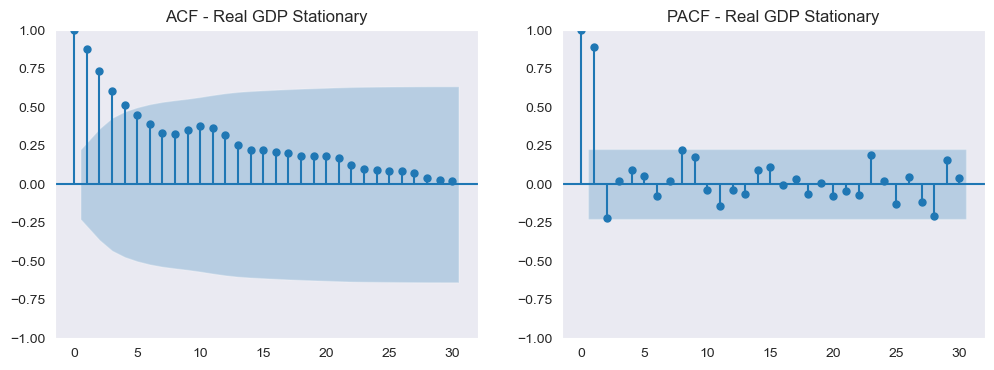

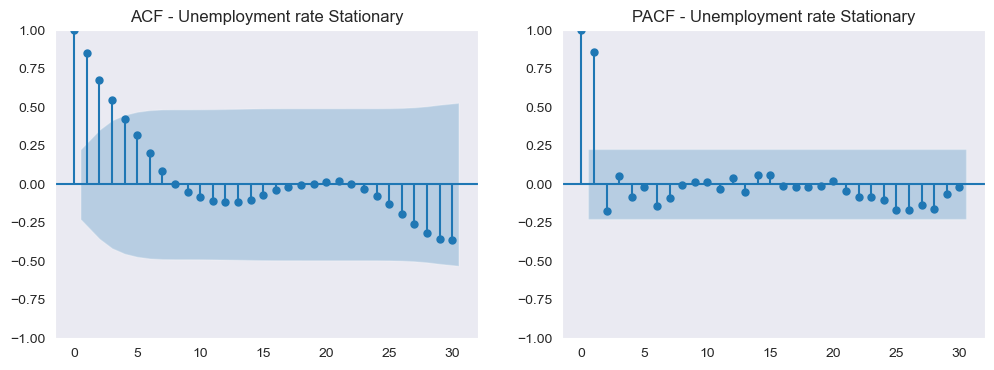

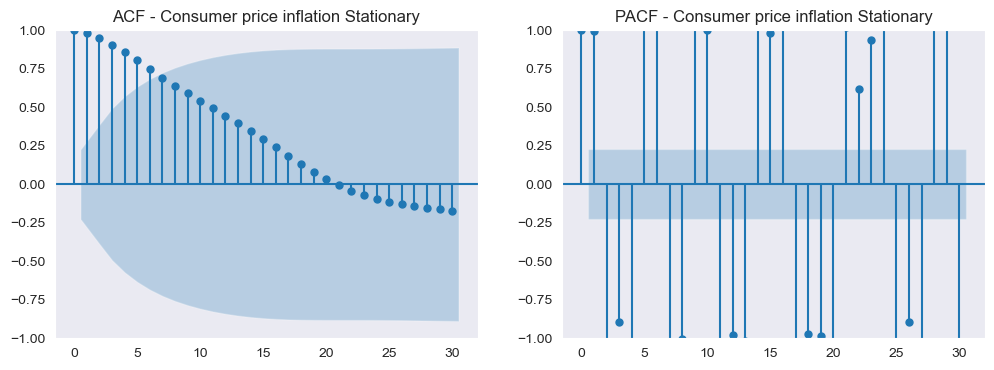

In [37]:
# Plot ACF and PACF for Real GDP
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sm.graphics.tsa.plot_acf(df['Real GDP Stationary'], lags=30, ax=ax1)
ax1.set_title('ACF - Real GDP Stationary')

sm.graphics.tsa.plot_pacf(df['Real GDP Stationary'], lags=30, ax=ax2)
ax2.set_title('PACF - Real GDP Stationary')
plt.show()

# Plot ACF and PACF for Unemployment rate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sm.graphics.tsa.plot_acf(df['Unemployment rate Stationary'], lags=30, ax=ax1)
ax1.set_title('ACF - Unemployment rate Stationary')

sm.graphics.tsa.plot_pacf(df['Unemployment rate Stationary'], lags=30, ax=ax2)
ax2.set_title('PACF - Unemployment rate Stationary')

plt.show()

# Plot ACF and PACF for Consumer price inflation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sm.graphics.tsa.plot_acf(df['Consumer price inflation Stationary'], lags=30, ax=ax1)
ax1.set_title('ACF - Consumer price inflation Stationary')

sm.graphics.tsa.plot_pacf(df['Consumer price inflation Stationary'], lags=30, ax=ax2)
ax2.set_title('PACF - Consumer price inflation Stationary')

plt.show()

**Question 38 :  Explain the principle of parsimony and its relationship with Ockham’s razor using the theory
of information criterion.**


The principle of parsimony advises maintaining simplicity in a regression model as a general rule. The idea is to keep the model as minimalistic as possible. If a small number of variables can substantially explain the variation in the independent variable Y, there is no need to add extra variables unnecessarily. More specifically, the Bayesian Information Criterion (BIC) imposes a stronger penalty on model specifications with a large number of parameters.

This preference for simpler models, with fewer parameters, in the BIC is analogous to the principle of Occam's razor. In other words, the BIC favors parsimony, suggesting that, all else being equal, the simplest model (with fewer parameters) is preferable to more complex models, provided it offers an adequate explanation of the data. Occam's razor, named after the medieval philosopher William of Occam, thus illustrates the idea that simple and elegant explanations are often superior to more complex ones.

**Question 39 : Explain the problem of auto-correlation of the errors**

Autocorrelation of errors, also known as serial correlation, is a statistical issue that arises when the errors (residuals) from a regression model are not independent over time. In a well-behaved regression model, the assumption is that the errors are independent, meaning that the occurrence of one error does not provide information about the occurrence of another.
To test the autocorrelation of the errors, we apply the Durbin Watson test on the residuals. 

**Question 40 : Using only stationary variables, run a regression of GDP on constant, unemployment and
inflation and test the hypothesis of no-autocorrelation of errors.** 


In [39]:
#OLS model
X = df[["Unemployment rate", "Consumer price inflation"]]
X = sm.add_constant(X)
y = df["Real GDP at market prices"]
model = sm.OLS(y,X).fit()
print(model.summary())


# Test for autocorrelation of errors (Durbin-Watson test)
test_statistic = sm.stats.stattools.durbin_watson(model.resid)
print(f'Durbin-Watson test statistic: {test_statistic}')

                                OLS Regression Results                               
Dep. Variable:     Real GDP at market prices   R-squared:                       0.961
Model:                                   OLS   Adj. R-squared:                  0.960
Method:                        Least Squares   F-statistic:                     1196.
Date:                       Mon, 11 Dec 2023   Prob (F-statistic):           1.46e-69
Time:                               00:09:55   Log-Likelihood:                -1268.3
No. Observations:                        101   AIC:                             2543.
Df Residuals:                             98   BIC:                             2551.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

**Question 41 : Regardless of your answer to question 40, correct auto-correlation with GLS. Comment on
the difference with question 40.**

In [40]:
#GLS model
X = df[["Unemployment rate", "Consumer price inflation"]]
X = sm.add_constant(X)
y = df["Real GDP at market prices"]
model = sm.GLS(y,X).fit()
print(model.summary())


                                GLS Regression Results                               
Dep. Variable:     Real GDP at market prices   R-squared:                       0.961
Model:                                   GLS   Adj. R-squared:                  0.960
Method:                        Least Squares   F-statistic:                     1196.
Date:                       Mon, 11 Dec 2023   Prob (F-statistic):           1.46e-69
Time:                               00:09:57   Log-Likelihood:                -1268.3
No. Observations:                        101   AIC:                             2543.
Df Residuals:                             98   BIC:                             2551.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

We have pretty similar answers.

**Question 42 :  For all variables, construct their lag 1 and lag 2 variables.**

In [41]:
# For all variables, we construct their lag 1 and lag 2 variables
new_columns = []
for column in df.columns[1:]:  # we exclude the 'Year' column
    for lag in range(1, 3):  # there are Lag 1 and Lag 2
        new_column_name = f'{column}_lag{lag}'
        
        # Check if the column already exists before creating it
        if new_column_name not in df.columns:
            df[new_column_name] = df[column].shift(lag)
            new_columns.append(new_column_name)


df

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,Real GDP MA,Unemployment rate MA,Consumer price inflation MA,Real GDP at market prices_lag1,Real GDP at market prices_lag2,Unemployment rate_lag1,...,Real GDP MA_lag2_lag1,Real GDP MA_lag2_lag2,Unemployment rate MA_lag1_lag1,Unemployment rate MA_lag1_lag2,Unemployment rate MA_lag2_lag1,Unemployment rate MA_lag2_lag2,Consumer price inflation MA_lag1_lag1,Consumer price inflation MA_lag1_lag2,Consumer price inflation MA_lag2_lag1,Consumer price inflation MA_lag2_lag2
240,1900,1.811603e+05,55.463046,1.130612,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,1901,1.849745e+05,55.465670,1.127220,NaN,NaN,NaN,1.811603e+05,NaN,55.463046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,1902,1.877566e+05,55.468294,1.127220,NaN,NaN,NaN,1.849745e+05,1.811603e+05,55.465670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,1903,1.860158e+05,55.470918,1.139657,NaN,NaN,NaN,1.877566e+05,1.849745e+05,55.468294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1904,1.881556e+05,55.473542,1.135135,NaN,NaN,NaN,1.860158e+05,1.877566e+05,55.470918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,1996,1.243709e+06,33.059776,68.818500,1133583.0,33.278142,59.389704,1.212798e+06,1.183144e+06,33.088292,...,1051557.6,1026119.9,33.371493,33.403080,33.403080,33.464556,54.905441,52.632912,52.632912,50.312835
337,1997,1.282602e+06,33.030485,70.074167,1159408.6,33.215404,61.614975,1.243709e+06,1.212798e+06,33.059776,...,1079408.1,1051557.6,33.323875,33.371493,33.371493,33.403080,57.141494,54.905441,54.905441,52.632912
338,1998,1.323527e+06,32.765721,71.165500,1183398.4,33.114249,63.769610,1.282602e+06,1.243709e+06,33.030485,...,1106436.0,1079408.1,33.278142,33.323875,33.323875,33.371493,59.389704,57.141494,57.141494,54.905441
339,1999,1.366983e+06,32.830686,72.111083,1208934.9,33.016365,65.758917,1.323527e+06,1.282602e+06,32.765721,...,1133583.0,1106436.0,33.215404,33.278142,33.278142,33.323875,61.614975,59.389704,59.389704,57.141494


**Question 43 : Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1
inflation, lag 2 inflation. What is the number of observations and why?**

In [42]:
# Drop rows with missing values (NaN) due to the lagged variables
df = df.dropna()

# Run the regression
X = df[["Unemployment rate_lag1","Unemployment rate_lag2","Consumer price inflation_lag1","Consumer price inflation_lag2"]]
X = sm.add_constant(X)
y = df["Real GDP at market prices"]
model = sm.OLS(y,X).fit()
print(model.summary())

# Number of observations
num_observations = len(df)
print(f"Number of observations: {num_observations}")

                                OLS Regression Results                               
Dep. Variable:     Real GDP at market prices   R-squared:                       0.958
Model:                                   OLS   Adj. R-squared:                  0.956
Method:                        Least Squares   F-statistic:                     474.9
Date:                       Mon, 11 Dec 2023   Prob (F-statistic):           2.62e-56
Time:                               00:10:00   Log-Likelihood:                -1107.6
No. Observations:                         88   AIC:                             2225.
Df Residuals:                             83   BIC:                             2238.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

The number of observations is determined by dropping the rows with missing values resulting from the creation of lagged variables. The dropna() function is used to remove rows with NaN (Not a Number) values.

**Question 44 - State and test the no-Granger causality hypothesis of unemployment on GDP at the 1% level**

Null Hypothesis (H0): The lagged values of "Unemployment rate" do not Granger-cause changes in "Real GDP at market prices."

The alternative hypothesis (H1) : There is Granger causality, that past values of "Unemployment rate" are useful in predicting changes in "Real GDP at market prices."

In [44]:
# We define the variables
X = df[["Real GDP at market prices", "Unemployment rate"]]
grangercausalitytests(X, maxlag=[5])



Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.0219  , p=0.4113  , df_denom=72, df_num=5
ssr based chi2 test:   chi2=5.8899  , p=0.3171  , df=5
likelihood ratio test: chi2=5.6903  , p=0.3375  , df=5
parameter F test:         F=1.0219  , p=0.4113  , df_denom=72, df_num=5


{5: ({'ssr_ftest': (1.0218569992486717, 0.4113112933671804, 72.0, 5),
   'ssr_chi2test': (5.889870204002759, 0.3170829799303068, 5),
   'lrtest': (5.690279328344104, 0.3375317209236115, 5),
   'params_ftest': (1.0218569992486188, 0.4113112933672087, 72.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

**Question 45 - Divide the sample in two groups: 1900-1960 and 1961-2000. Test the stability of coefficients 
between the two periods**

In [45]:
# Assuming 'Year' is the column containing the years in your DataFrame
df_period1 = df[df['Year'].between(1900, 1960)]
df_period2 = df[df['Year'].between(1961, 2000)]

# Define the variables for the full sample
X_full = sm.add_constant(df[['Unemployment rate_lag1', 'Unemployment rate_lag2', 'Consumer price inflation_lag1', 'Consumer price inflation_lag2']])
y_full = df['Real GDP at market prices']
model_full = sm.OLS(y_full, X_full).fit()

# Define the variables for each period
X_period1 = sm.add_constant(df_period1[['Unemployment rate_lag1', 'Unemployment rate_lag2', 'Consumer price inflation_lag1', 'Consumer price inflation_lag2']])
y_period1 = df_period1['Real GDP at market prices']
model_period1 = sm.OLS(y_period1, X_period1).fit()

X_period2 = sm.add_constant(df_period2[['Unemployment rate_lag1', 'Unemployment rate_lag2', 'Consumer price inflation_lag1', 'Consumer price inflation_lag2']])
y_period2 = df_period2['Real GDP at market prices']
model_period2 = sm.OLS(y_period2, X_period2).fit()

# Get residuals from each period
residuals_full = model_full.resid
residuals_period1 = model_period1.resid
residuals_period2 = model_period2.resid

# Degrees of freedom for each period
df_residuals_full = len(residuals_full) - len(model_full.params)
df_residuals_period1 = len(residuals_period1) - len(model_period1.params)
df_residuals_period2 = len(residuals_period2) - len(model_period2.params)

# Define N1 and N2
N1, N2 = len(residuals_period1), len(residuals_period2)

# Degrees of freedom for the stability test
ddl = N1 + N2 - 2 * k

# Utility function to compute SSR
def comp_ssr(u): 
    return np.sum(u**2)

# Computing SSR for each subset
SSR_init = comp_ssr(residuals_full)
SSR_S1 = comp_ssr(residuals_period1)
SSR_S2 = comp_ssr(residuals_period2)

# Calculate the F-statistic for stability test
numerator = (SSR_init - (SSR_S1 + SSR_S2)) / k
denominator = ((SSR_S1 + SSR_S2) / (N1 + N2 - 2 * k))
F_statistic_stability = numerator / denominator

# Calculate the p-value for stability test
p_value_stability = 1 - f.cdf(F_statistic_stability, q, ddl)

# Print results for stability test
print('===== Stability Test Results =====')
print(f'* F-statistic for stability test: {F_statistic_stability}')
print(f'* p-value for stability test: {p_value_stability}')

# Test d'hypothèse
alpha = 0.1
if p_value_stability < alpha:
    print("Reject the null hypothesis at the 10% level ")
else:
    print("Fail to reject the null hypothesis at the 10% level")


===== Stability Test Results =====
* F-statistic for stability test: 59.88894444339053
* p-value for stability test: 1.1102230246251565e-16
Reject the null hypothesis at the 10% level 


**Question 46 - Test the structural breakpoint using a trim ratio of 30% at the 1% level**

In [46]:
# Utility function to compute SSR:
def comp_ssr(u):
    ssr = np.sum(u**2)
    return ssr

# Computing F_chow:
N1, N2 = 106, 106
k = 2  # Number of coefficients in the regression
q, ddl = k, N1 + N2 - 2 * k

SSR_init = comp_ssr(residuals_full)
SSR_S1 = comp_ssr(residuals_period1)
SSR_S2 = comp_ssr(residuals_period2)

F_chow = ((SSR_init - (SSR_S1 + SSR_S2)) / k) / ((SSR_S1 + SSR_S2) / (N1 + N2 - 2 * k))
p_value_chow = f.sf(F_chow, q, ddl)

# Print results for Chow's test
print('===== Chow\'s Test Results =====')
print(f'* Chow\'s test value F_chow: {F_chow}')
print(f'* p-value for Chow\'s test: {p_value_chow}')

# Test d'hypothèse
alpha = 0.1
if p_value_stability < alpha:
    print("Reject the null hypothesis at the 10% level ")
else:
    print("Fail to reject the null hypothesis at the 10% level")

===== Chow's Test Results =====
* Chow's test value F_chow: 227.87013007729078
* p-value for Chow's test: 3.8974277159570194e-53
Reject the null hypothesis at the 10% level 
